In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [7]:
# Nombres de las columnas en la misma secuencia que aparecen en el archivo CSV
nombres_columnas = [
    "num_class", "alcohol", "malic_acid", "ash", "alcalinity_of_ash",
    "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols",
    "proanthocyanins", "color_intensity", "hue", "od280_od315_of_diluted_wines",
    "proline"
]

In [9]:
# Cargar el archivo CSV sin encabezados y usando los nombres de columna proporcionados
df = pd.read_csv('./wine.data', header=None, names=nombres_columnas)
df

,num_class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [11]:
# Seleccionar las columnas relevantes (variables independientes) para el análisis
# Excluir la columna "num_class" ya que es la variable objetivo
features = [
    'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
    'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
    'color_intensity', 'hue', 'od280_od315_of_diluted_wines', 'proline'
]

In [15]:
# Crear conjuntos de características (X) y la variable objetivo (y)
X = df[features]
y = df['num_class']

In [17]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [23]:
# Calcular la precisión del modelo
accuracy = (y_pred == y_test).mean()
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Precisión del modelo: 94.44%


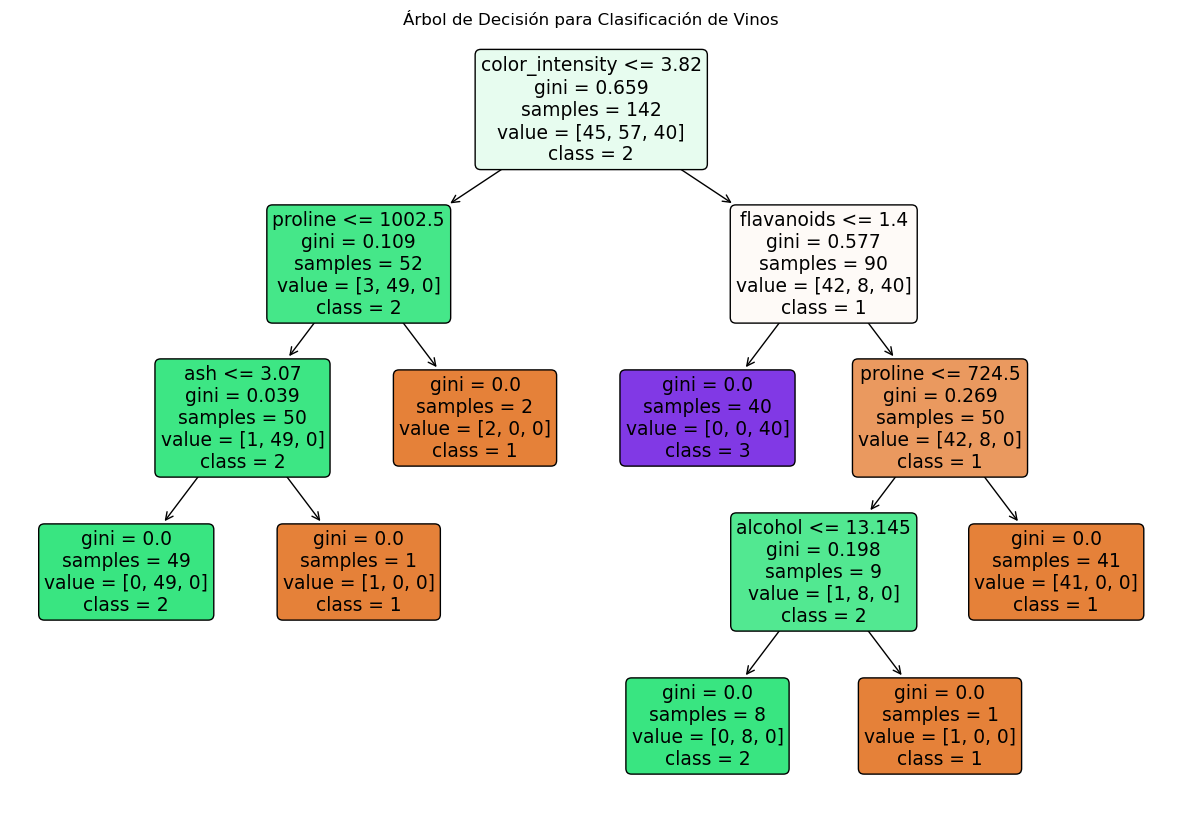

In [25]:
# Crear y mostrar el árbol de decisión
plt.figure(figsize=(15, 10))
tree.plot_tree(model, feature_names=features, class_names=[str(i) for i in range(1, 4)], filled=True, rounded=True)
plt.title("Árbol de Decisión para Clasificación de Vinos")
plt.show()